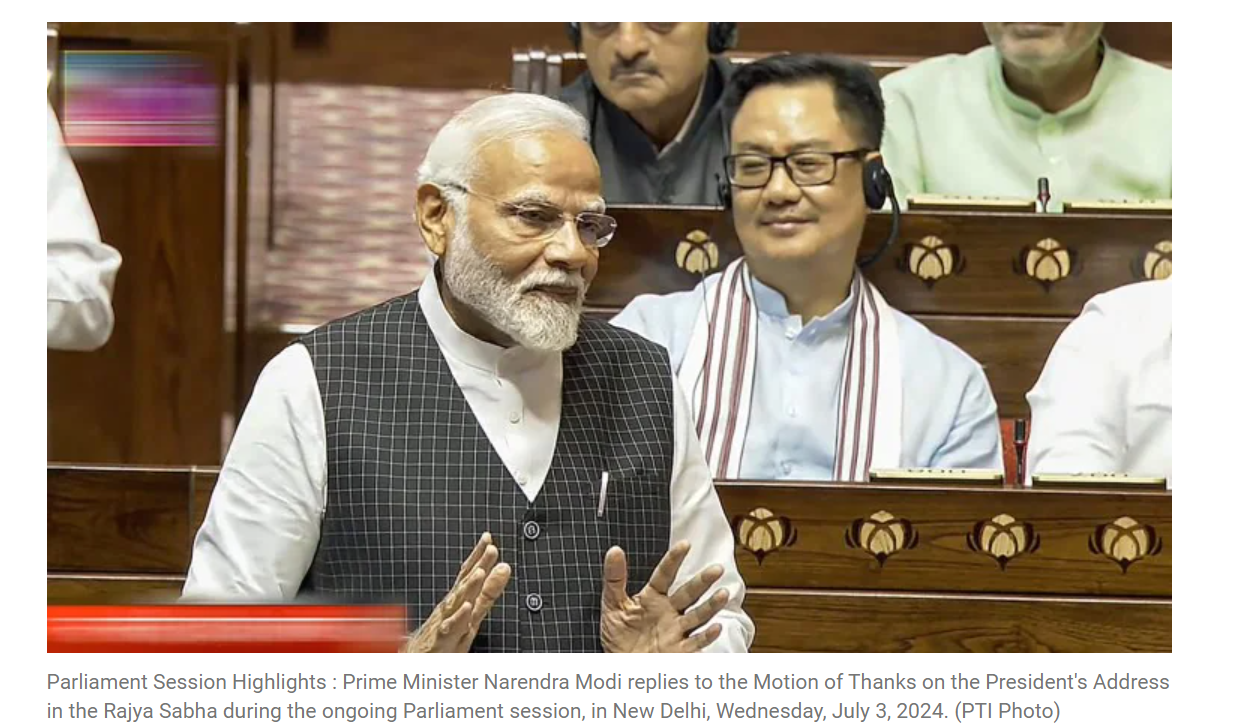

In [5]:
#!pip install nltk
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to C:\Users\KUMAR
[nltk_data]     SUNDRAM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\KUMAR
[nltk_data]     SUNDRAM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\KUMAR
[nltk_data]     SUNDRAM\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
file_path = "speech.txt"
with open(file_path, "r", encoding='utf-8') as file:
    speech_text = file.read()
print(file_path)
print(speech_text)

speech.txt
“I have come to express immense gratitude towards each and every citizen of India for repeatedly showing their trust in the government”

“Many key legislations did not get the discussion they deserved as the opposition put politics above them”

“This time period of the 21st century will impact the country for the next thousand years. We all should have a single focus”

“We have given the youth of India a government free of scams”

“Today a trust has arisen in the heart of the poor to fulfill his dreams”

“Opposition is not able to see the trust of people as they are so steeped in distrust”

“In 2028, when you will bring a No Confidence Motion, the Country will be among the top 3”

“Opposition believes in changing names but they can’t change their work culture”

“Freedom fighters and founding fathers of the country always opposed dynasty politics”

“Crimes against women are unacceptable and the Central Government and the State Government will work to ensure that the guilty ar

In [33]:
speech_text_cleaned233 = re.sub(r'[^a-zA-Z0-9]',' ', speech_text)
speech_text_cleaned233

' I have come to express immense gratitude towards each and every citizen of India for repeatedly showing their trust in the government    Many key legislations did not get the discussion they deserved as the opposition put politics above them    This time period of the 21st century will impact the country for the next thousand years  We all should have a single focus    We have given the youth of India a government free of scams    Today a trust has arisen in the heart of the poor to fulfill his dreams    Opposition is not able to see the trust of people as they are so steeped in distrust    In 2028  when you will bring a No Confidence Motion  the Country will be among the top 3    Opposition believes in changing names but they can t change their work culture    Freedom fighters and founding fathers of the country always opposed dynasty politics    Crimes against women are unacceptable and the Central Government and the State Government will work to ensure that the guilty are punished

In [21]:
speech_text_cleaned = re.sub(r'[^\w\s]','', speech_text)
speech_text_cleaned = speech_text_cleaned.lower()
words = word_tokenize(speech_text_cleaned)
stop_words = set(stopwords.words('english'))
word_filtered = [word for word in words if word not in stop_words]
word_filtered

['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'trust',
 'government',
 'many',
 'key',
 'legislations',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'years',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'free',
 'scams',
 'today',
 'trust',
 'arisen',
 'heart',
 'poor',
 'fulfill',
 'dreams',
 'opposition',
 'able',
 'see',
 'trust',
 'people',
 'steeped',
 'distrust',
 '2028',
 'bring',
 'confidence',
 'motion',
 'country',
 'among',
 'top',
 '3',
 'opposition',
 'believes',
 'changing',
 'names',
 'cant',
 'change',
 'work',
 'culture',
 'freedom',
 'fighters',
 'founding',
 'fathers',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'crimes',
 'women',
 'unacceptable',
 'central',
 'government',
 'state',
 'government',
 'work',
 'ensure',
 'guilty',
 'punished',
 '

In [25]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [23]:
words

['i',
 'have',
 'come',
 'to',
 'express',
 'immense',
 'gratitude',
 'towards',
 'each',
 'and',
 'every',
 'citizen',
 'of',
 'india',
 'for',
 'repeatedly',
 'showing',
 'their',
 'trust',
 'in',
 'the',
 'government',
 'many',
 'key',
 'legislations',
 'did',
 'not',
 'get',
 'the',
 'discussion',
 'they',
 'deserved',
 'as',
 'the',
 'opposition',
 'put',
 'politics',
 'above',
 'them',
 'this',
 'time',
 'period',
 'of',
 'the',
 '21st',
 'century',
 'will',
 'impact',
 'the',
 'country',
 'for',
 'the',
 'next',
 'thousand',
 'years',
 'we',
 'all',
 'should',
 'have',
 'a',
 'single',
 'focus',
 'we',
 'have',
 'given',
 'the',
 'youth',
 'of',
 'india',
 'a',
 'government',
 'free',
 'of',
 'scams',
 'today',
 'a',
 'trust',
 'has',
 'arisen',
 'in',
 'the',
 'heart',
 'of',
 'the',
 'poor',
 'to',
 'fulfill',
 'his',
 'dreams',
 'opposition',
 'is',
 'not',
 'able',
 'to',
 'see',
 'the',
 'trust',
 'of',
 'people',
 'as',
 'they',
 'are',
 'so',
 'steeped',
 'in',
 'distrust

In [27]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
words_lemmatized = [lemmatizer.lemmatize(word) for word in word_filtered]
words_lemmatized

['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'trust',
 'government',
 'many',
 'key',
 'legislation',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'year',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'free',
 'scam',
 'today',
 'trust',
 'arisen',
 'heart',
 'poor',
 'fulfill',
 'dream',
 'opposition',
 'able',
 'see',
 'trust',
 'people',
 'steeped',
 'distrust',
 '2028',
 'bring',
 'confidence',
 'motion',
 'country',
 'among',
 'top',
 '3',
 'opposition',
 'belief',
 'changing',
 'name',
 'cant',
 'change',
 'work',
 'culture',
 'freedom',
 'fighter',
 'founding',
 'father',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'crime',
 'woman',
 'unacceptable',
 'central',
 'government',
 'state',
 'government',
 'work',
 'ensure',
 'guilty',
 'punished',
 'peace',
 '

In [37]:
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(word)['compound'] for word in words_lemmatized]
average_sentiment = sum(sentiment_scores)/len(sentiment_scores)
average_sentiment

0.014298377028714108

In [39]:
sentiment_scores

[0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5106,
 -0.5719,
 0.0,
 0.5106,
 0.0,
 0.0,
 -0.4767,
 0.4404,
 0.25,
 0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 -0.4215,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.2023,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6369,
 0.1531,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5423,
 0.0,
 -0.4588,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3818,
 -0.4215,
 -0.4588,
 0.5423,
 0.0,
 0.0,
 0.0,
 0.0,
 0.34,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0516,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4215,
 0.3818,
 0.0,
 0.0,
 0.4019,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.296,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.296,
 0.0,
 0.0,
 0.0,
 0.0,


In [41]:
len(sentiment_scores)

1602

In [43]:
sum(sentiment_scores)

22.906000000000002

In [45]:
positive_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] > 0.1]
negative_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] < -0.1]
neutral_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] >= -0.1 and sentiment_scores[i] <= 0.1]

In [47]:
print("The positive words are :", positive_words)

The positive words are : ['gratitude', 'trust', 'free', 'trust', 'fulfill', 'dreams', 'trust', 'confidence', 'top', 'freedom', 'fighters', 'ensure', 'peace', 'assure', 'faith', 'commitment', 'party', 'revered', 'confidence', 'gratitude', 'trust', 'confidence', 'strength', 'lucky', 'confidence', 'blessings', 'better', 'important', 'interest', 'party', 'free', 'energy', 'determination', 'huge', 'dreams', 'strengths', 'dreams', 'free', 'courage', 'opportunity', 'confidence', 'confidence', 'growth', 'trust', 'fulfill', 'dreams', 'marvel', 'helping', 'save', 'helping', 'save', 'helping', 'save', 'trust', 'like', 'wish', 'well', 'best', 'profit', 'increased', 'success', 'growing', 'stronger', 'responsible', 'vision', 'top', 'definite', 'confidence', 'top', 'faith', 'like', 'agree', 'peace', 'trusting', 'trust', 'certain', 'opportunity', 'trust', 'trust', 'confidence', 'help', 'parties', 'faith', 'dwelled', 'fascination', 'freedom', 'fighters', 'dedicated', 'party', 'freebies', 'winning', 'as

In [49]:
print("The negative words are :", negative_words)

The negative words are : ['scams', 'poor', 'distrust', 'crimes', 'unacceptable', 'guilty', 'punished', 'pressure', 'stop', 'poor', 'deprived', 'betrayal', 'disappointed', 'scams', 'stressed', 'unsuccessful', 'poor', 'poverty', 'poverty', 'poor', 'poor', 'criticizing', 'distrust', 'bad', 'bad', 'criticism', 'bad', 'misinformation', 'confuse', 'scam', 'crisis', 'severely', 'attacked', 'ills', 'questioned', 'lack', 'poverty', 'hard', 'distrusting', 'lack', 'strike', 'enemy', 'ill', 'misinformed', 'insecurity', 'misinformed', 'low', 'fool', 'arrogance', 'arrogant', 'contradictions', 'damages', 'suffered', 'victims', 'perturbed', 'stuck', 'warned', 'havoc', 'lamented', 'reckless', 'pressure', 'violence', 'saddening', 'crimes', 'unacceptable', 'guilty', 'punished', 'protest', 'failure', 'attack', 'neglect', 'conflict', 'forbidden', 'forbidden', 'loss', 'lack', 'pressure', 'stop', 'worse', 'petty', 'pain', 'suffering']


In [51]:
print("The neutral words are :", neutral_words)

The neutral words are : ['come', 'express', 'immense', 'towards', 'every', 'citizen', 'india', 'repeatedly', 'showing', 'government', 'many', 'key', 'legislations', 'get', 'discussion', 'deserved', 'opposition', 'put', 'politics', 'time', 'period', '21st', 'century', 'impact', 'country', 'next', 'thousand', 'years', 'single', 'focus', 'given', 'youth', 'india', 'government', 'today', 'arisen', 'heart', 'opposition', 'able', 'see', 'people', 'steeped', '2028', 'bring', 'motion', 'country', 'among', '3', 'opposition', 'believes', 'changing', 'names', 'cant', 'change', 'work', 'culture', 'founding', 'fathers', 'country', 'always', 'opposed', 'dynasty', 'politics', 'women', 'central', 'government', 'state', 'government', 'work', 'manipur', 'march', 'path', 'development', 'people', 'manipur', 'mothers', 'daughters', 'manipur', 'nation', 'stands', 'house', 'stands', 'government', 'leave', 'stone', 'unturned', 'manipur', 'gets', 'back', 'track', 'development', 'government', 'given', 'first', 